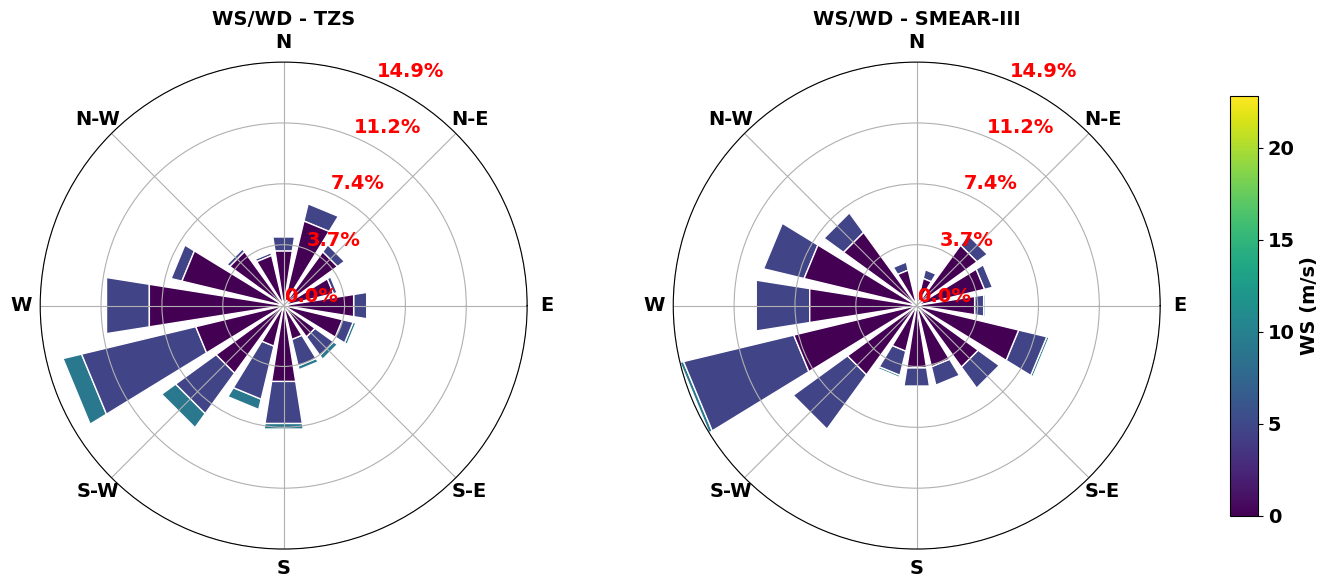

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from windrose import WindroseAxes
import numpy as np
from matplotlib import cm  # Import colormap module

# Define the file path to your Excel file
file_path = "/Users/touqeergill/Desktop/TZS+ SMEAR (Wind Rose).xlsx"

# Load the Excel file and read both sheets
df_tzs = pd.read_excel(file_path, sheet_name="TZS")
df_smear = pd.read_excel(file_path, sheet_name="Smear")

# Determine the maximum wind speed across both datasets
max_speed = max(df_tzs["VELOCIDAD"].max(), df_smear["VELOCIDAD"].max())  

# Define uniform wind speed bins
num_bins = 6  # Adjust the number of bins as needed
bins = np.linspace(0, max_speed, num_bins)  # Create uniform bins

# Set colormap correctly
cmap = cm.get_cmap("viridis")  # Convert colormap name to an object

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 7), subplot_kw={'projection': 'windrose'})

# Windrose plot for TZS (Left)
ax1 = axes[0]
ax1.bar(df_tzs["DIRECCION"], df_tzs["VELOCIDAD"], normed=True, opening=0.8, edgecolor='white', bins=bins, cmap=cmap)
ax1.set_title("WS/WD - TZS", fontsize=14, fontweight='bold')

# Windrose plot for Smear (Right)
ax2 = axes[1]
ax2.bar(df_smear["DIRECCION"], df_smear["VELOCIDAD"], normed=True, opening=0.8, edgecolor='white', bins=bins, cmap=cmap)
ax2.set_title("WS/WD - SMEAR-III", fontsize=14, fontweight='bold')

# Ensure both plots have the same maximum frequency scale
max_radius = max(ax1.get_rmax(), ax2.get_rmax())  
ax1.set_rmax(max_radius)  
ax2.set_rmax(max_radius)  

# Define uniform radial ticks
radial_ticks = np.linspace(0, max_radius, 5)
ax1.set_yticks(radial_ticks)
ax2.set_yticks(radial_ticks)

# Format radial tick labels as percentages with fontsize=14, bold, and red color
ax1.set_yticklabels([f"{tick:.1f}%" for tick in radial_ticks], fontsize=14, fontweight="bold", color='red')
ax2.set_yticklabels([f"{tick:.1f}%" for tick in radial_ticks], fontsize=14, fontweight="bold", color='red')

# UPDATED: Make directional labels (N, E, S, W, etc.) bold and size 14
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=14, fontweight="bold")
ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=14, fontweight="bold")

# Add a common color bar for wind speed
cbar_ax = fig.add_axes([0.9, 0.2, 0.02, 0.6])  # Position of colorbar
norm = plt.Normalize(vmin=0, vmax=max_speed)  # Normalize wind speeds
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, cax=cbar_ax)

# Set color bar label
cbar.set_label("WS (m/s)", fontsize=14, fontweight='bold')

# UPDATED: Set color bar tick values bold and font size 14
for label in cbar.ax.get_yticklabels():
    label.set_fontsize(14)
    label.set_fontweight("bold")

# Adjust layout to avoid warnings and improve spacing
plt.subplots_adjust(left=0.05, right=0.85, top=0.9, bottom=0.1, wspace=0.3)

# Show the plots
plt.show()

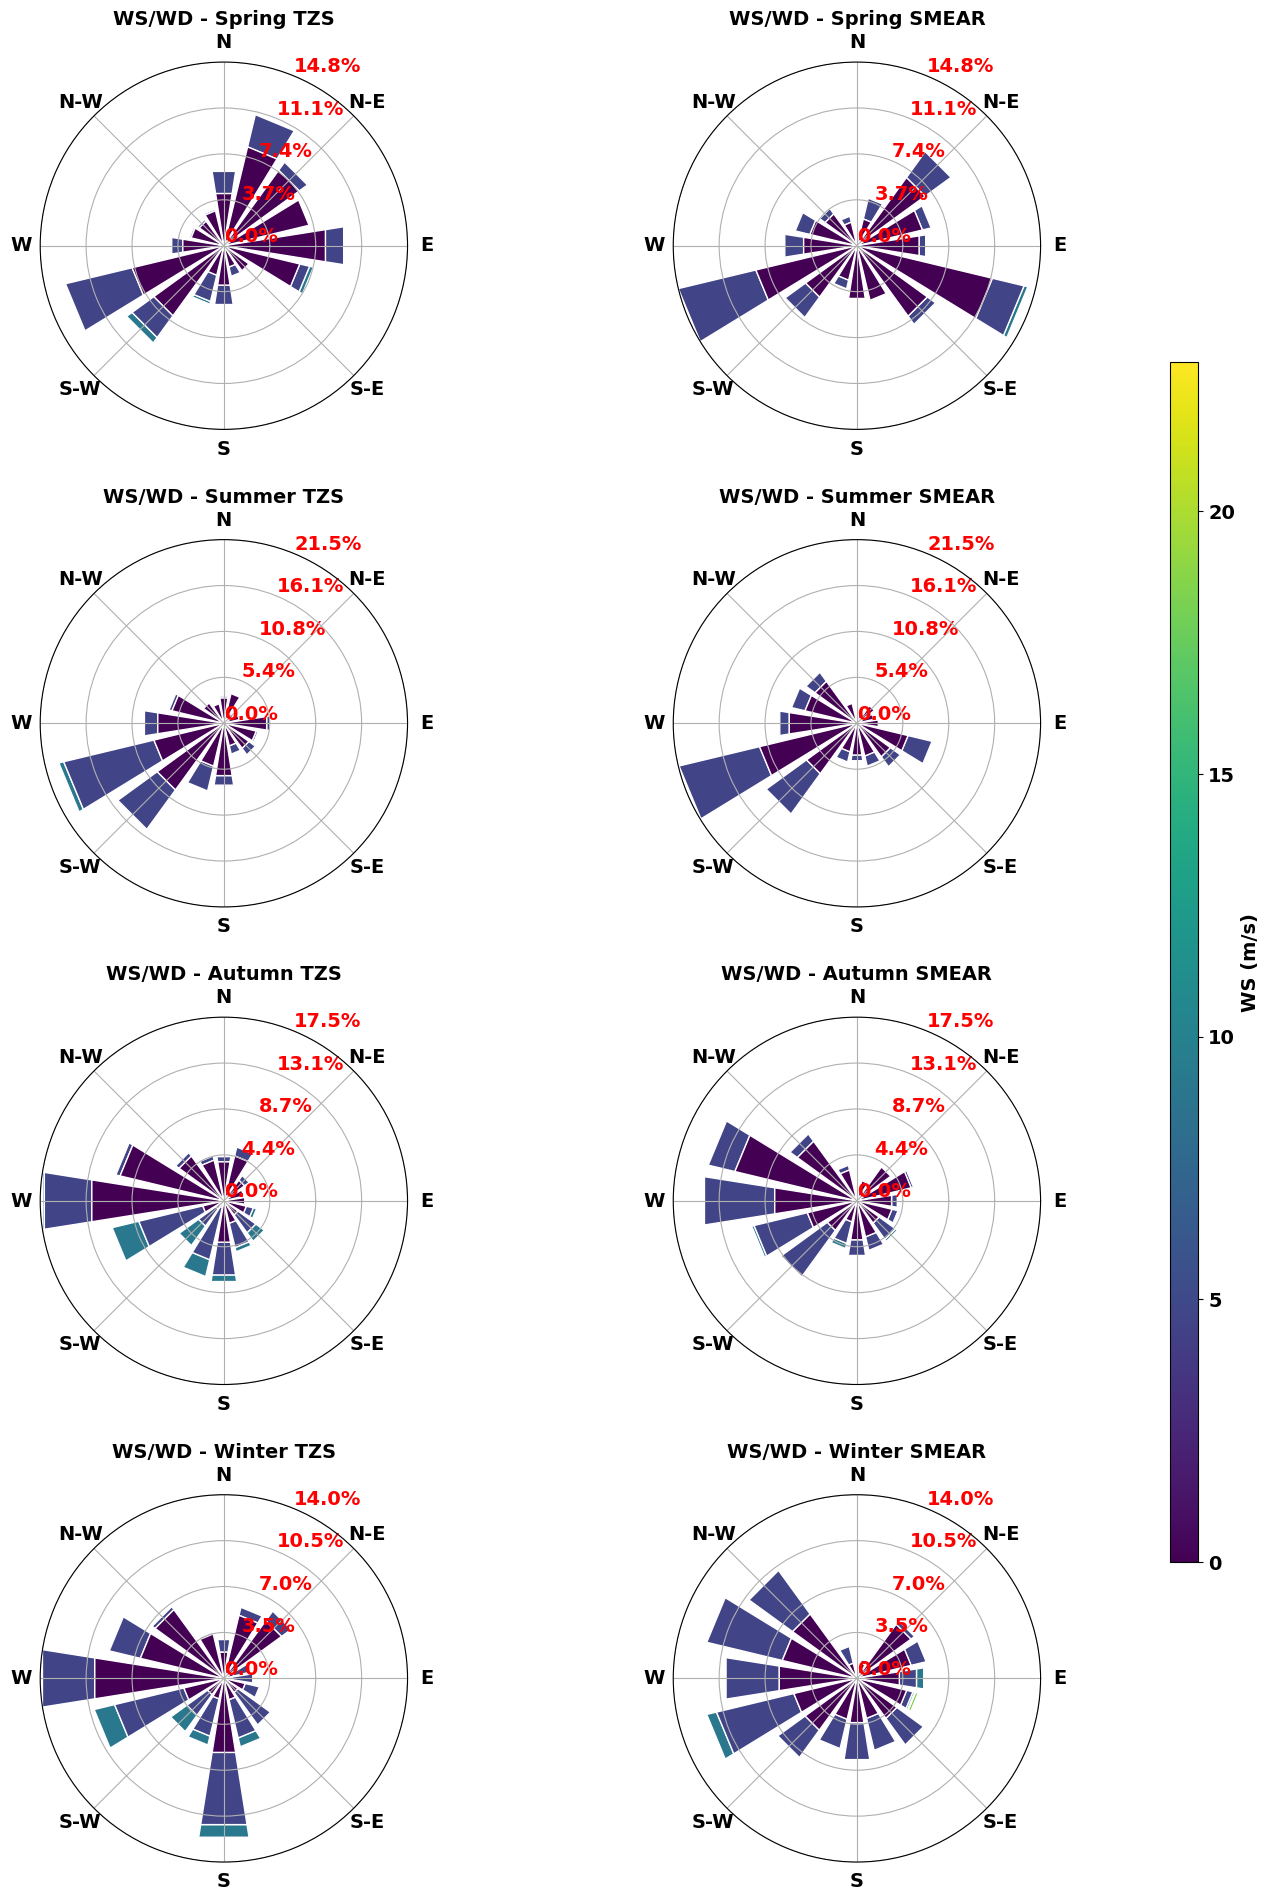

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from windrose import WindroseAxes
import numpy as np
from matplotlib import cm

# Define the file path to your Excel file
file_path = "/Users/touqeergill/Desktop/TZS+ SMEAR (Wind Rose_Seasonal).xlsx"

# Define seasons
seasons = ["Spring", "Summer", "Autumn", "Winter"]

# Load all seasonal data into dictionaries
tzs_data = {season: pd.read_excel(file_path, sheet_name=f"{season} TZS") for season in seasons}
smear_data = {season: pd.read_excel(file_path, sheet_name=f"{season} SMEAR") for season in seasons}

# Determine the maximum wind speed across all datasets
max_speed = max(
    max(df["VELOCIDAD"].max() for df in tzs_data.values()),
    max(df["VELOCIDAD"].max() for df in smear_data.values())
)

# Define uniform wind speed bins
num_bins = 6
bins = np.linspace(0, max_speed, num_bins)

# Set colormap
cmap = cm.get_cmap("viridis")

# Create a figure with 4 rows and 2 columns (8 subplots)
fig, axes = plt.subplots(4, 2, figsize=(14, 20), subplot_kw={'projection': 'windrose'})

# Generate windrose plots
for i, season in enumerate(seasons):
    # Left: TZS
    ax1 = axes[i, 0]
    ax1.bar(tzs_data[season]["DIRECCION"], tzs_data[season]["VELOCIDAD"],
            normed=True, opening=0.8, edgecolor='white', bins=bins, cmap=cmap)
    ax1.set_title(f"WS/WD - {season} TZS", fontsize=14, fontweight='bold')

    # Right: SMEAR
    ax2 = axes[i, 1]
    ax2.bar(smear_data[season]["DIRECCION"], smear_data[season]["VELOCIDAD"],
            normed=True, opening=0.8, edgecolor='white', bins=bins, cmap=cmap)
    ax2.set_title(f"WS/WD - {season} SMEAR", fontsize=14, fontweight='bold')

    # Ensure consistent radial scale
    max_radius = max(ax1.get_rmax(), ax2.get_rmax())
    ax1.set_rmax(max_radius)
    ax2.set_rmax(max_radius)

    # Define uniform radial ticks
    radial_ticks = np.linspace(0, max_radius, 5)
    ax1.set_yticks(radial_ticks)
    ax2.set_yticks(radial_ticks)

    # Format radial tick labels as percentages with fontsize=14, bold, and red color
    ax1.set_yticklabels([f"{tick:.1f}%" for tick in radial_ticks], fontsize=14, fontweight="bold", color='red')
    ax2.set_yticklabels([f"{tick:.1f}%" for tick in radial_ticks], fontsize=14, fontweight="bold", color='red')

    # Make directional labels (N, E, S, W, etc.) bold and size 14
    ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=14, fontweight="bold")
    ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=14, fontweight="bold")

# Add a common color bar for wind speed
cbar_ax = fig.add_axes([0.9, 0.2, 0.02, 0.6])
norm = plt.Normalize(vmin=0, vmax=max_speed)
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, cax=cbar_ax)

# Set color bar label with bold font size 14
cbar.set_label("WS (m/s)", fontsize=14, fontweight='bold')

# Set color bar tick values bold and font size 14
for label in cbar.ax.get_yticklabels():
    label.set_fontsize(14)
    label.set_fontweight("bold")

# Adjust layout
plt.subplots_adjust(left=0.05, right=0.85, top=0.95, bottom=0.05, wspace=0.3, hspace=0.3)

# Show the plots
plt.show()

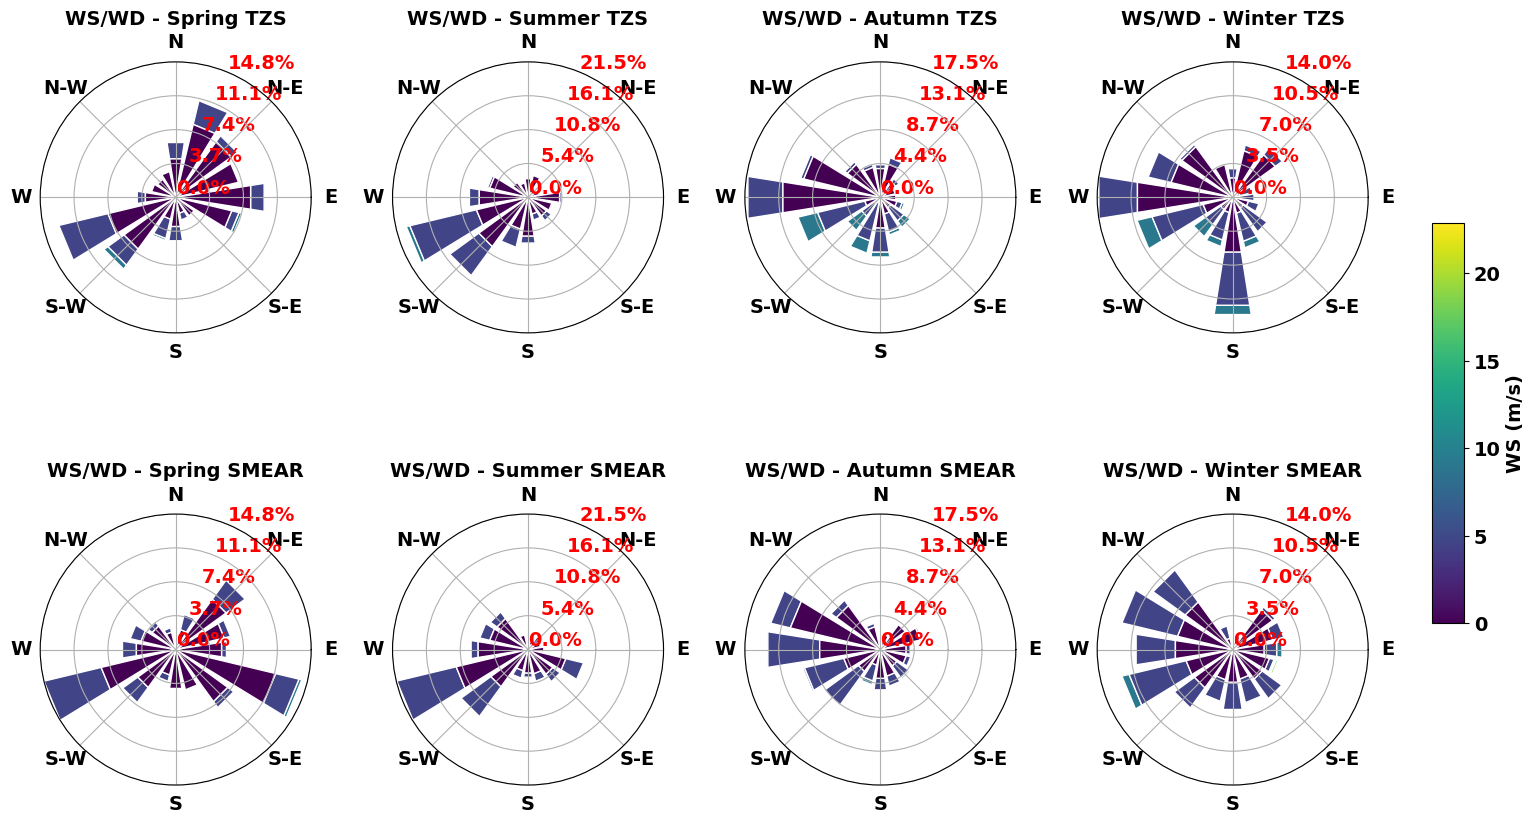

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from windrose import WindroseAxes
import numpy as np
from matplotlib import cm

# Define the file path to your Excel file
file_path = "/Users/touqeergill/Desktop/TZS+ SMEAR (Wind Rose_Seasonal).xlsx"

# Define seasons
seasons = ["Spring", "Summer", "Autumn", "Winter"]

# Load all seasonal data into dictionaries
tzs_data = {season: pd.read_excel(file_path, sheet_name=f"{season} TZS") for season in seasons}
smear_data = {season: pd.read_excel(file_path, sheet_name=f"{season} SMEAR") for season in seasons}

# Determine the maximum wind speed across all datasets
max_speed = max(
    max(df["VELOCIDAD"].max() for df in tzs_data.values()),
    max(df["VELOCIDAD"].max() for df in smear_data.values())
)

# Define uniform wind speed bins
num_bins = 6
bins = np.linspace(0, max_speed, num_bins)

# Set colormap
cmap = cm.get_cmap("viridis")

# Create a figure with 2 rows and 4 columns (8 subplots)
fig, axes = plt.subplots(2, 4, figsize=(16, 10), subplot_kw={'projection': 'windrose'})

# Generate windrose plots
for i, season in enumerate(seasons):
    # Top row: TZS
    ax1 = axes[0, i]
    ax1.bar(tzs_data[season]["DIRECCION"], tzs_data[season]["VELOCIDAD"],
            normed=True, opening=0.8, edgecolor='white', bins=bins, cmap=cmap)
    ax1.set_title(f"WS/WD - {season} TZS", fontsize=14, fontweight='bold')

    # Bottom row: SMEAR
    ax2 = axes[1, i]
    ax2.bar(smear_data[season]["DIRECCION"], smear_data[season]["VELOCIDAD"],
            normed=True, opening=0.8, edgecolor='white', bins=bins, cmap=cmap)
    ax2.set_title(f"WS/WD - {season} SMEAR", fontsize=14, fontweight='bold')

    # Ensure consistent radial scale
    max_radius = max(ax1.get_rmax(), ax2.get_rmax())
    ax1.set_rmax(max_radius)
    ax2.set_rmax(max_radius)

    # Define uniform radial ticks
    radial_ticks = np.linspace(0, max_radius, 5)
    ax1.set_yticks(radial_ticks)
    ax2.set_yticks(radial_ticks)

    # Format radial tick labels as percentages with fontsize=14, bold, and red color
    ax1.set_yticklabels([f"{tick:.1f}%" for tick in radial_ticks], fontsize=14, fontweight="bold", color='red')
    ax2.set_yticklabels([f"{tick:.1f}%" for tick in radial_ticks], fontsize=14, fontweight="bold", color='red')

    # Make directional labels (N, E, S, W, etc.) bold and size 14
    ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=14, fontweight="bold")
    ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=14, fontweight="bold")

# Add a common color bar for wind speed
cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])  # Adjusted position for horizontal layout
norm = plt.Normalize(vmin=0, vmax=max_speed)
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, cax=cbar_ax)

# Set color bar label with bold font size 14
cbar.set_label("WS (m/s)", fontsize=14, fontweight='bold')

# Set color bar tick values bold and font size 14
for label in cbar.ax.get_yticklabels():
    label.set_fontsize(14)
    label.set_fontweight("bold")

# Adjust layout for better spacing
plt.subplots_adjust(left=0.05, right=0.88, top=0.9, bottom=0.1, wspace=0.3, hspace=0.3)

# Show the plots
plt.show()